In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,7)

In [2]:
from kagglehub import KaggleDatasetAdapter, load_dataset

df = load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "himanshupoddar/zomato-bangalore-restaurants",
    "zomato.csv"
)


/tmp/ipython-input-2-2690333047.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = load_dataset(


In [3]:
len(df)

51717

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.drop(columns=['url','phone'],inplace=True)



---

We can also drop **dish_liked** , **reviews_list** , **menu_list** but can be used for NLP.

In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
dish_liked,28078
rate,7775
approx_cost(for two people),346
rest_type,227
cuisines,45
location,21
address,0
votes,0
book_table,0
name,0


In [8]:
(df['location']!=df['listed_in(city)']).sum()

np.int64(35697)



---


A lot of restaurants have different location and the city it is listed in.

In [9]:
df['approx_cost(for two people)']

,approx_cost(for two people)
0,800
1,800
2,800
3,300
4,600
...,...
51712,"1,500"
51713,600
51714,"2,000"
51715,"2,500"




---


We need to remove comma (,) from "approx_cost(for two people)" and convert them to "float".

In [10]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','').astype(float)

In [11]:
df['approx_cost(for two people)']

,approx_cost(for two people)
0,800.0
1,800.0
2,800.0
3,300.0
4,600.0
...,...
51712,1500.0
51713,600.0
51714,2000.0
51715,2500.0


In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)





---


*   There are "NEW" and "-" for no rating, we can convert them into null values.
*   We can keep NANs for EDA and handle then before modelling.



In [13]:
df['rate']=df['rate'].replace(['NEW','-'],np.nan).str.replace('/5','',regex=False).astype(float)

In [14]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])



---

How many restaurants have "dish_liked" info?

In [15]:
df['dish_liked'].notna().mean() * 100

np.float64(45.70837442233695)


45 % of the restaurants have "dish_liked" data.


In [16]:
df.groupby(df['dish_liked'].notna())['rate'].mean()

,rate
dish_liked,
False,3.438856
True,3.903406


Average rating for restaurants:



*   With dish_liked info : **3.9**
*   Without dish_liked info : **3.4**

This suggests that the presence of dish_liked data correlates positively with better ratings.

We can also engineer a binary feature with this.


---





In [17]:
df['has_dish_liked'] = df['dish_liked'].notna().astype(int)
df['has_dish_liked'].head()

,has_dish_liked
0,1
1,1
2,1
3,1
4,1




---


What are the most common cuisines in Bangalore?

In [18]:
df_cuisines = df[df['cuisines'].notna()].copy()
df_cuisines['cuisines'] = df_cuisines['cuisines'].str.split(',\s*')
df_exploded = df_cuisines.explode('cuisines')
df_exploded['cuisines'] = df_exploded['cuisines'].str.strip().str.title()
cuisine_count = df_exploded['cuisines'].value_counts().reset_index()
cuisine_count

,cuisines,count
0,North Indian,21085
1,Chinese,15547
2,South Indian,8644
3,Fast Food,8096
4,Biryani,6492
...,...,...
102,Sindhi,4
103,Pan Asian,3
104,Hot Dogs,3
105,Indian,2


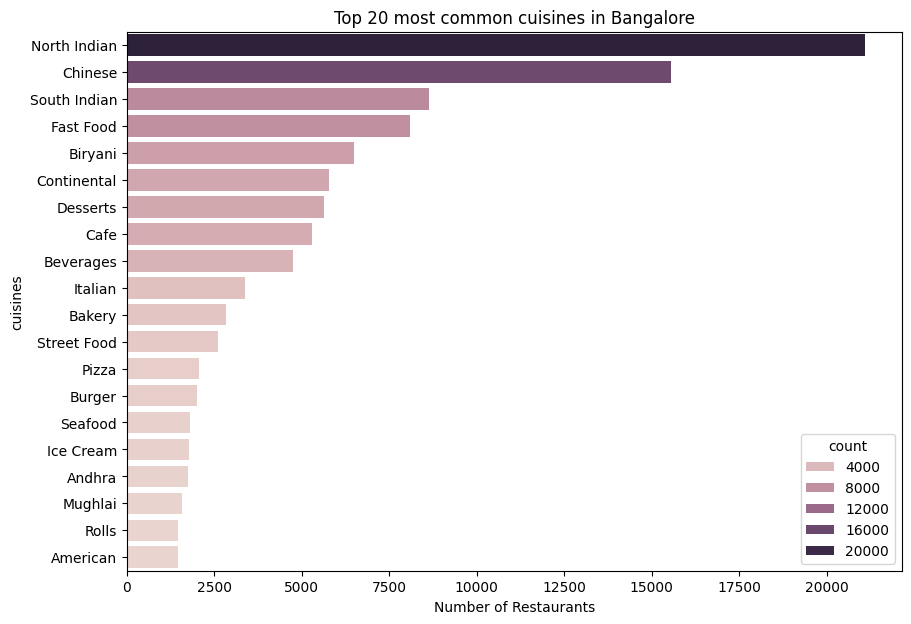

In [19]:
sns.barplot(data=cuisine_count.head(20),x='count',y='cuisines',hue='count')
plt.title('Top 20 most common cuisines in Bangalore')
plt.xlabel('Number of Restaurants')
plt.show()



1.   Most common cuisines are **North Indian, chinese, South indian, Fast food and Biryani**.
2.   Are people prefering North Indian dishes or More North Indians live in Bangalore?


---





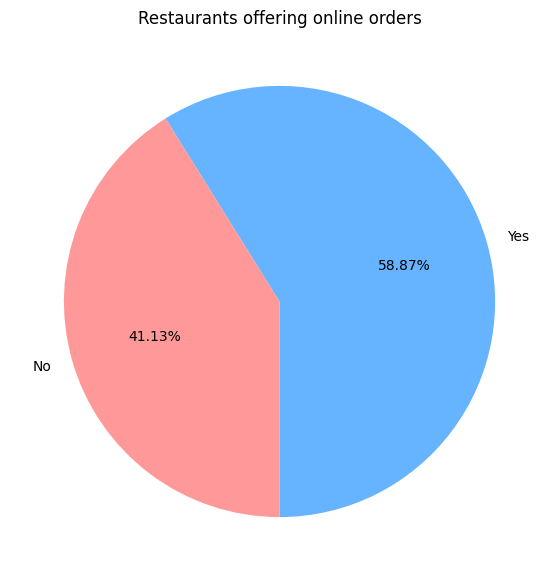

In [20]:
plt.pie(df['online_order'].value_counts(),labels=df['online_order'].unique(),autopct='%1.2f%%',startangle=270,colors=['#66b3ff', '#ff9999'])
plt.title('Restaurants offering online orders')
plt.show()


Almost 60% of the restaurants offer the online orders.

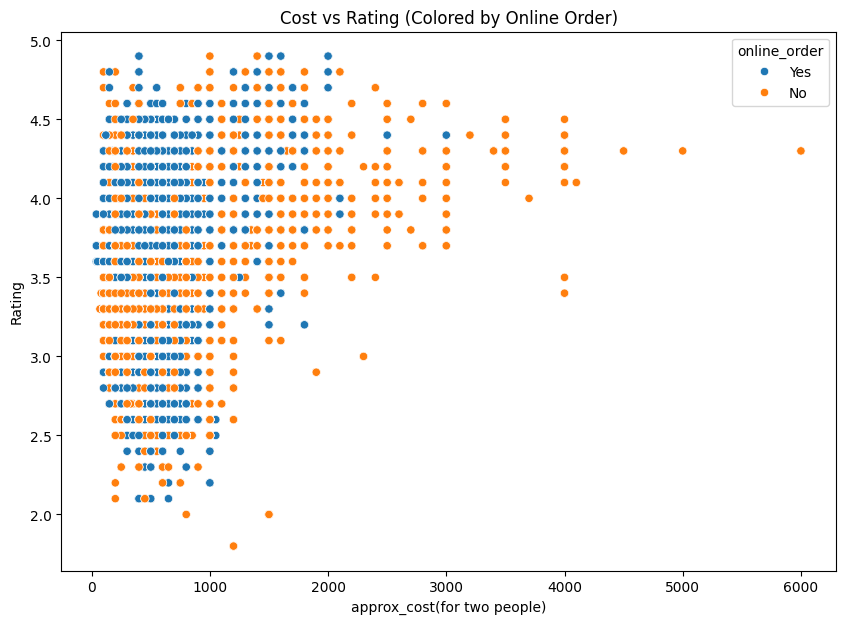

In [21]:
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate', hue='online_order')
plt.title("Cost vs Rating (Colored by Online Order)")
plt.ylabel("Rating")
plt.show()


1.  It seems that the more expensive a restaurant is, the less likely it is to offer online ordering.
2.  Higher cost restaurants have higher ratings.




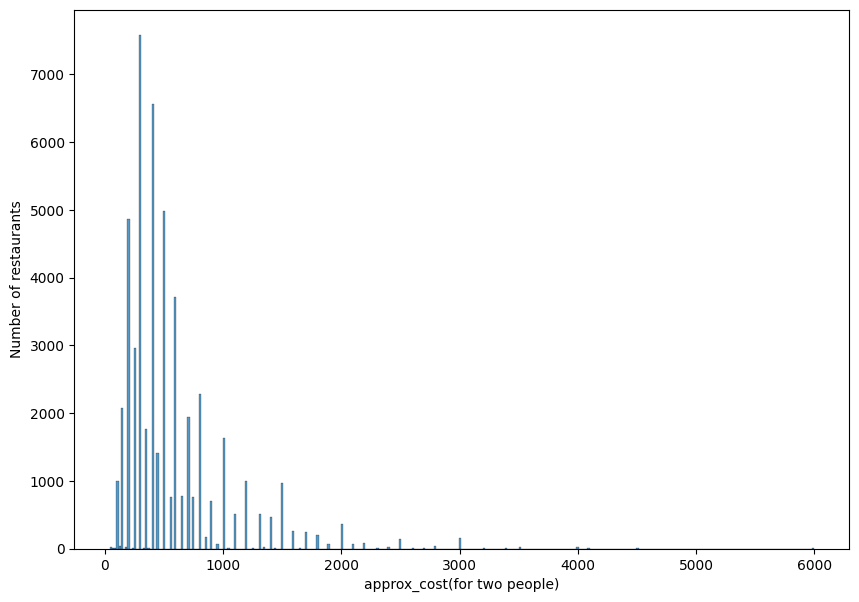

In [23]:
sns.histplot(data=df,x='approx_cost(for two people)')
plt.ylabel('Number of restaurants')
plt.show()

Cost distribution

In [24]:
df['approx_cost(for two people)'].value_counts()

,count
approx_cost(for two people),
300.0,7576
400.0,6562
500.0,4980
200.0,4857
600.0,3714
...,...
469.0,1
60.0,1
560.0,1


Most of the restaurants have approx cost for two people between 300 to 600.

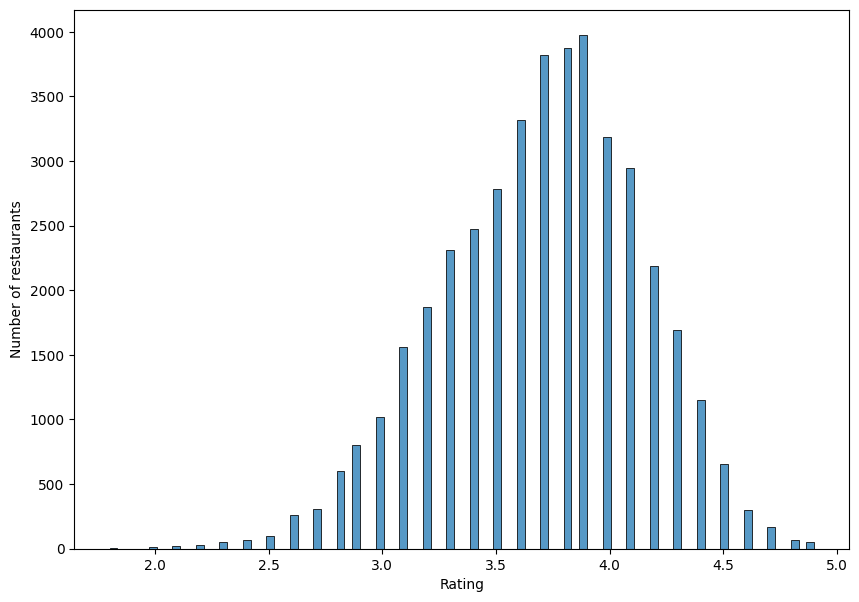

In [25]:
sns.histplot(data=df,x='rate')
plt.ylabel('Number of restaurants')
plt.xlabel('Rating')
plt.show()

Rating distribution.

In [26]:
df['rate'].describe()

,rate
count,41665.000000
mean,3.700449
std,0.440513
min,1.800000
25%,3.400000
50%,3.700000
75%,4.000000
max,4.900000


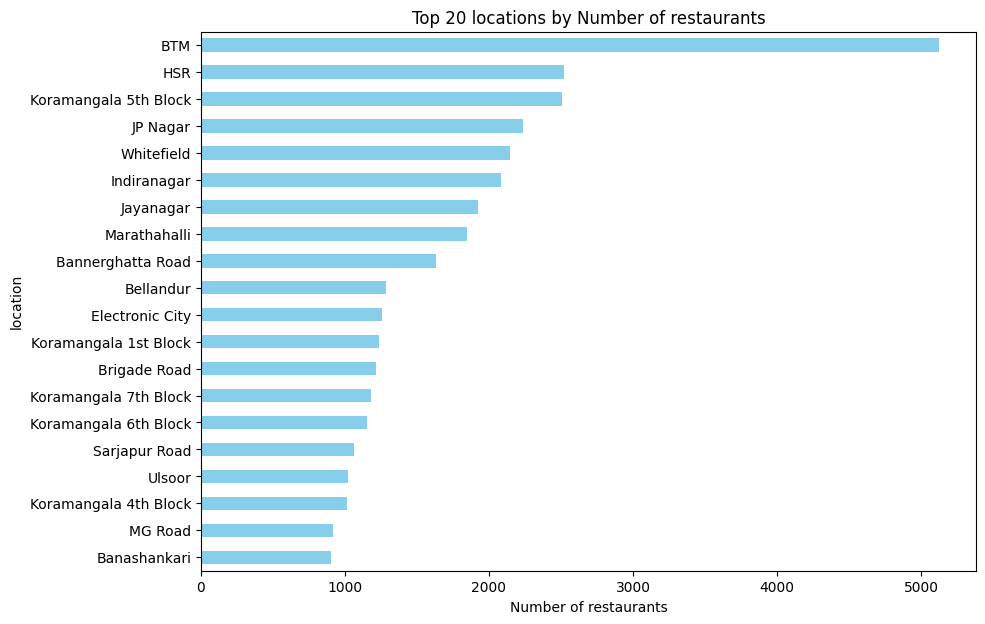

In [27]:
loc_df = df['location'].value_counts().head(20)
loc_df.sort_values().plot(kind='barh',color='skyblue')
plt.xlabel('Number of restaurants')
plt.title('Top 20 locations by Number of restaurants')
plt.show()

Majority of the restaurants are located in BTM(Byrasandra, Tavarekere and Madiwala).

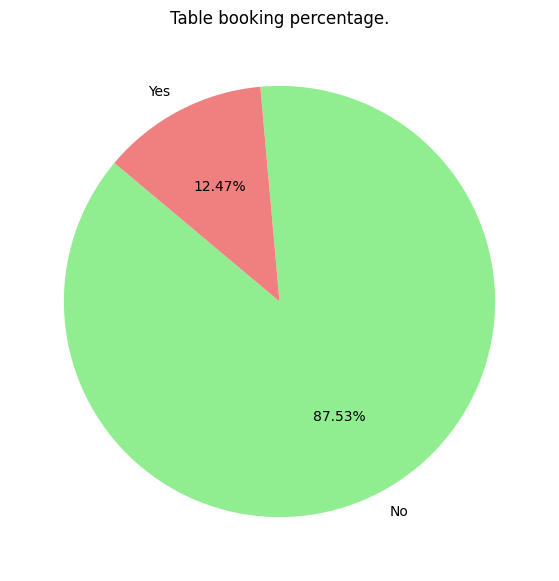

In [28]:
booking_count = df['book_table'].value_counts()
plt.pie(booking_count,autopct='%1.2f%%',labels=booking_count.index,colors=['lightgreen', 'lightcoral'], startangle=140)
plt.title('Table booking percentage.')
plt.show()



*   Only 12% of restaurants offer table booking service.



In [29]:
avg_cost = df.groupby('book_table')['approx_cost(for two people)'].mean()
avg_cost

,approx_cost(for two people)
book_table,
No,452.655158
Yes,1271.344394


We can clearly see that expensive restaurants more likely to have table booking service.

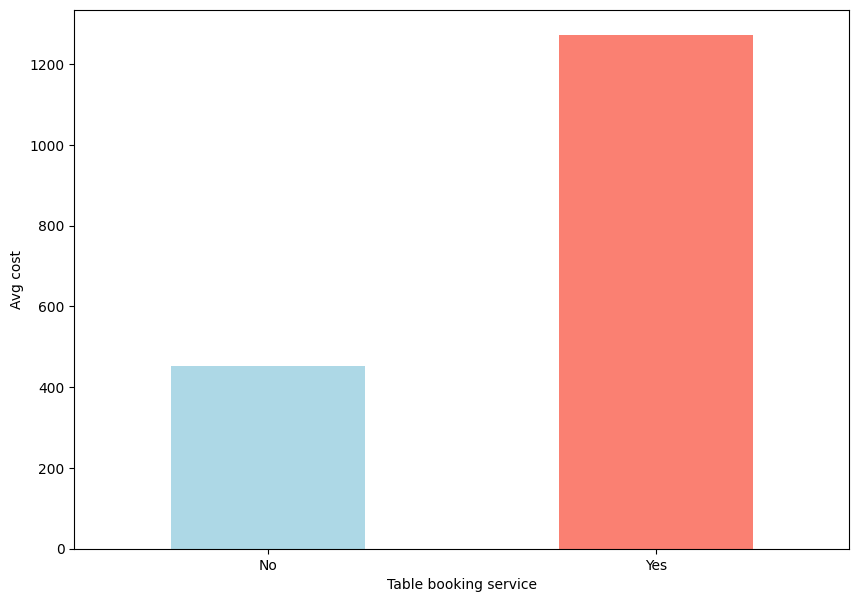

In [30]:
avg_cost.plot(kind='bar',color=['lightblue','salmon'])
plt.ylabel('Avg cost')
plt.xlabel('Table booking service')
plt.xticks(rotation=0)
plt.show()

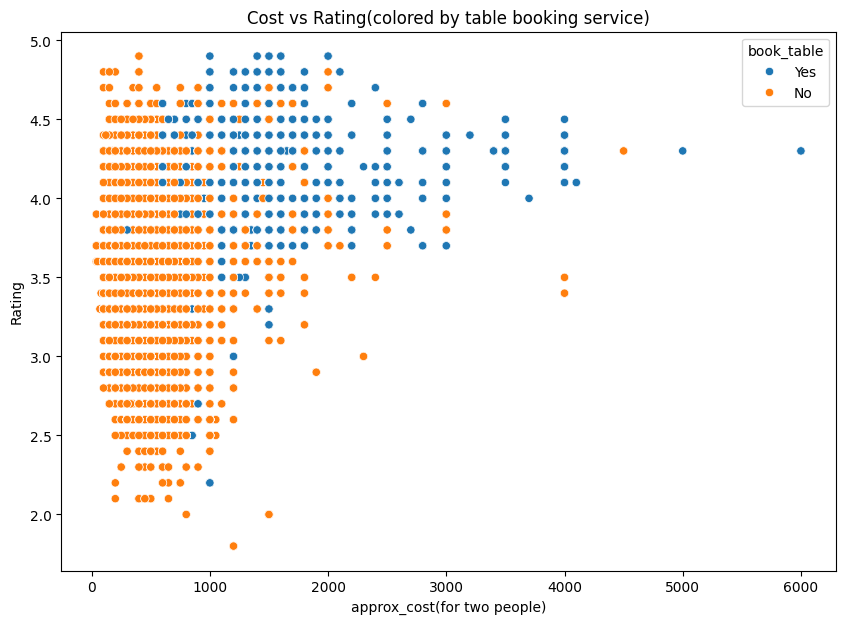

In [31]:
sns.scatterplot(data=df,x='approx_cost(for two people)',y='rate',hue='book_table')
plt.ylabel('Rating')
plt.title('Cost vs Rating(colored by table booking service)')
plt.show()

Restaurants offer table booking service tend to have better rating and they are more expensive.

In [32]:
listed_type = df['listed_in(type)'].value_counts()
listed_type

,count
listed_in(type),
Delivery,25942
Dine-out,17779
Desserts,3593
Cafes,1723
Drinks & nightlife,1101
Buffet,882
Pubs and bars,697


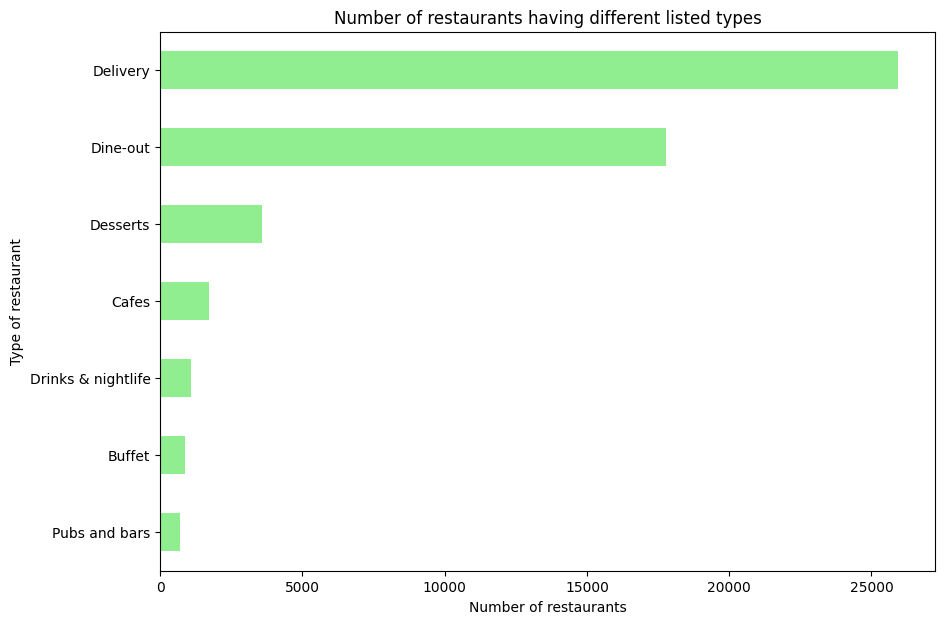

In [33]:
listed_type.sort_values().plot(kind='barh',color='lightgreen')
plt.title('Number of restaurants having different listed types')
plt.xlabel('Number of restaurants')
plt.ylabel('Type of restaurant')
plt.show()



*   More than 25 thousand restaurants listed in Delivery type.
*   There are 697 services listed under Pubs and bars.



In [34]:
pubs_bars = df[df['listed_in(type)']=='Pubs and bars']['location'].value_counts()
pubs_bars

,count
location,
Indiranagar,69
Koramangala 5th Block,58
MG Road,38
Lavelle Road,35
Koramangala 4th Block,34
Whitefield,33
Ulsoor,30
Residency Road,26
Koramangala 7th Block,26


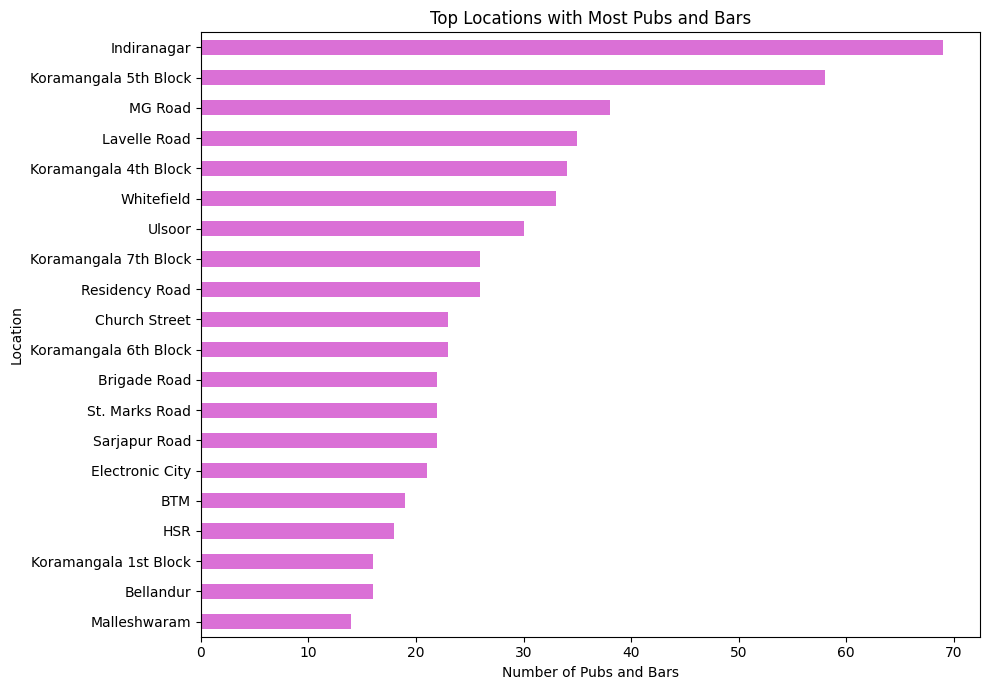

In [35]:
pubs_bars.head(20).sort_values().plot(kind='barh',color='orchid')
plt.title('Top Locations with Most Pubs and Bars')
plt.xlabel('Number of Pubs and Bars')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

There are most Pubs and bars in **Indira nagar, Koramangala and MG road**.

In [36]:
df[df['listed_in(type)']=='Drinks & nightlife']['location'].value_counts()

,count
location,
Koramangala 5th Block,84
Indiranagar,69
Koramangala 4th Block,62
Lavelle Road,61
Brigade Road,58
MG Road,57
Residency Road,56
Koramangala 6th Block,51
JP Nagar,51


Almost Same with Drinks and Night life.


---



In [37]:
res_chains = df['name'].value_counts()
res_chains

,count
name,
Cafe Coffee Day,96
Onesta,85
Just Bake,73
Empire Restaurant,71
Five Star Chicken,70
...,...
Hunan Express,1
Sri chowdeshwari Mudde Hotel,1
Mothi Restaurant,1


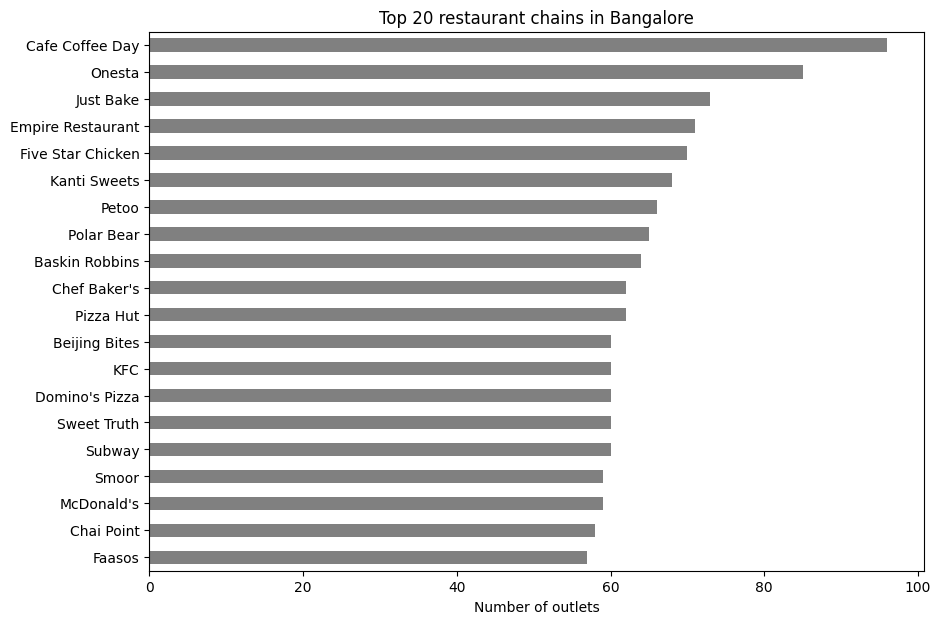

In [38]:
res_chains.head(20).sort_values().plot(kind='barh',color='gray')
plt.title('Top 20 restaurant chains in Bangalore')
plt.ylabel(None)
plt.xlabel('Number of outlets')
plt.show()

Cafe coffe day has 96 outlets across Bangalore.

In [42]:
online_order_votes = df.groupby('online_order')['votes'].sum()
online_order_votes

,votes
online_order,
No,5324971
Yes,9347014


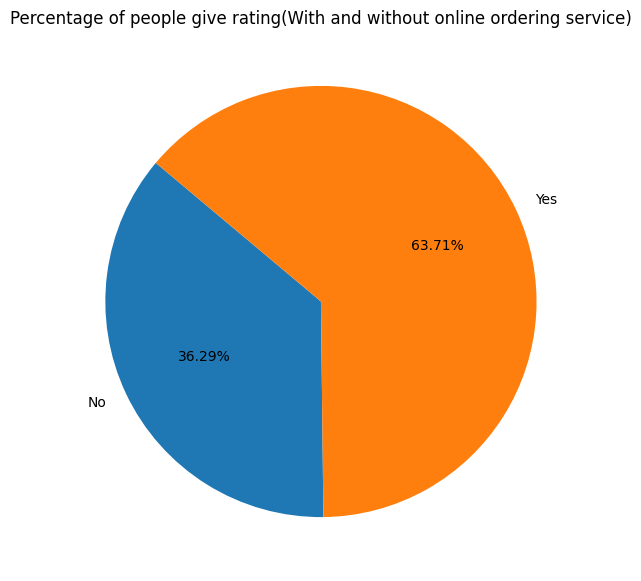

In [47]:
plt.pie(online_order_votes,labels=online_order_votes.index,startangle=140,autopct='%1.2f%%')
plt.title('Percentage of people give rating(With and without online ordering service)')
plt.show()

1.  There are 64% more voting for restaurants that provive online order service.
2.  May be platform encourage customers to give reviews.



In [56]:
df_rest_type = df[df['rest_type'].notna()].copy()
df_rest_type['rest_type'] = df_rest_type['rest_type'].str.split(',\s*')
df_rest_type_exploded = df_rest_type.explode('rest_type')
df_rest_type_exploded['rest_type'] = df_rest_type_exploded['rest_type'].str.strip().str.title()
res_type_count = df_rest_type_exploded['rest_type'].value_counts()
res_type_count

,count
rest_type,
Quick Bites,20639
Casual Dining,13057
Cafe,5074
Delivery,4641
Dessert Parlor,3211
Bar,2457
Takeaway,2157
Bakery,1998
Beverage Shop,1471


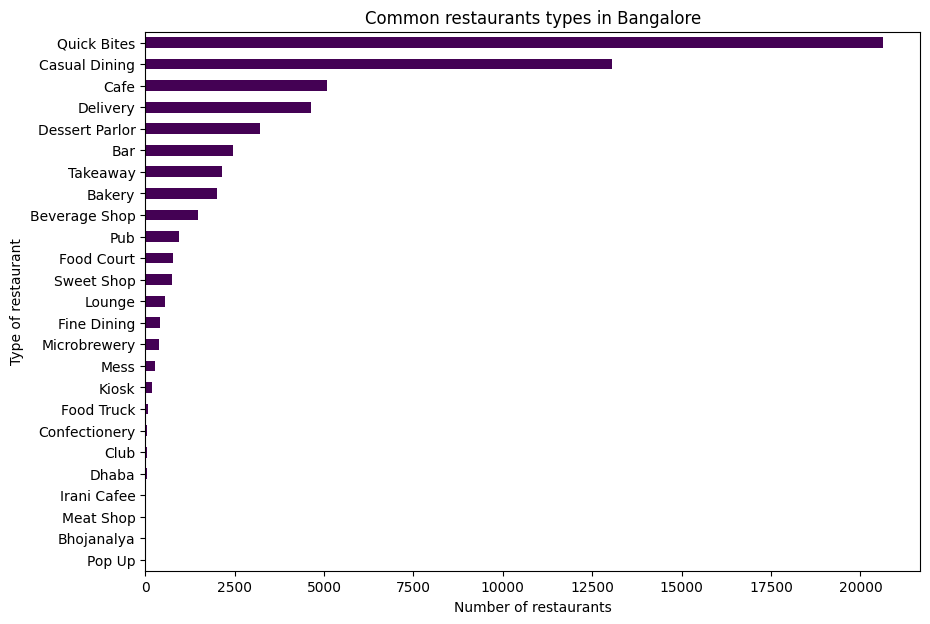

In [59]:
res_type_count.sort_values().plot(kind='barh',colormap='viridis')
plt.title('Common restaurants types in Bangalore')
plt.ylabel('Type of restaurant')
plt.xlabel('Number of restaurants')
plt.show()

Bangalore people prefer Quick bites More.

In [85]:
df_exploded.groupby('location')['cuisines'].value_counts().groupby(level=0).head(3).reset_index()

,location,cuisines,count
0,BTM,North Indian,2469
1,BTM,Chinese,1824
2,BTM,Fast Food,986
3,Banashankari,North Indian,309
4,Banashankari,Chinese,259
...,...,...,...
272,Yelahanka,Biryani,2
273,Yelahanka,Kerala,2
274,Yeshwantpur,North Indian,72
275,Yeshwantpur,Chinese,65


Location vise Top 3 common cuisines.



---


Are Highly Rated Restaurants Actually Popular?** (Votes vs rating)**

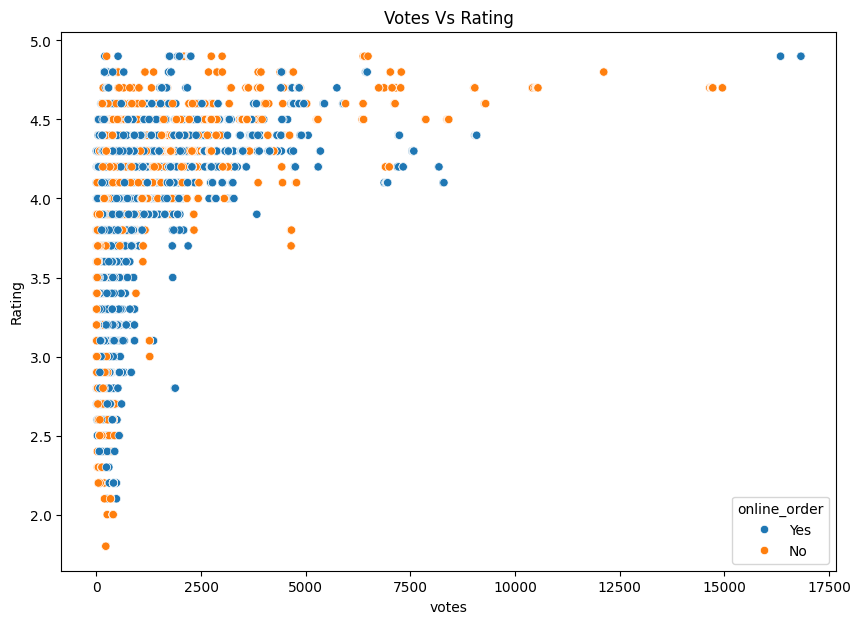

In [92]:
sns.scatterplot(data=df,x='votes',y='rate',hue='online_order')
plt.title('Votes Vs Rating')
plt.ylabel('Rating')
plt.show()

1.  Popular Restaurants are highly rated.
2.  Top-left → high rating, low votes (possibly inflated).

In [104]:
inflated = df[(df['votes'] <= 10) & (df['rate'] >= 4.0)].copy()
inflated[['name','location','votes','rate']].sort_values(by='rate',ascending=False)

,name,location,votes,rate
21198,All Aromas,Jayanagar,0,4.3
8521,Chaatimes,BTM,9,4.2
30091,Chaatimes,BTM,9,4.2
33140,Chaatimes,BTM,9,4.2
20331,Chaatimes,BTM,9,4.2
22500,Chaatimes,BTM,9,4.2
35852,Chaatimes,BTM,9,4.2
1510,Chaatimes,BTM,9,4.1
50610,Copper Chimney,Whitefield,0,4.1
8267,Tangerine - Davanam Sarovar Portico Suites,Koramangala 2nd Block,0,4.0


These could be inflated ratings because it contains less than 10 votes.



---

Wordcloud of Most Common Dishes Liked.

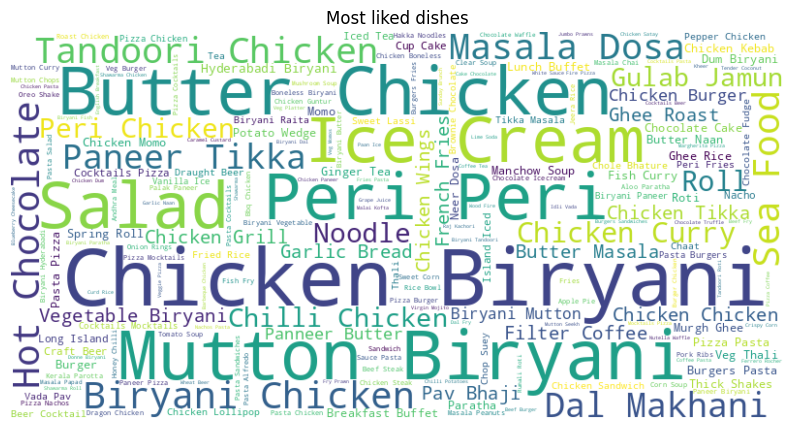

In [113]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(dish for dish in df['dish_liked'].dropna())
wordcloud = WordCloud(width=800,height=400,background_color='white',stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most liked dishes')
plt.show()



---

Cuisine Co-occurrence Analysis

In [122]:
from itertools import combinations
from collections import Counter

cuisines_pairs = df_cuisines['cuisines'].apply(lambda x : list(combinations(sorted(x),2)))
flat_pairs = [pairs for sublist in cuisines_pairs for pairs in sublist]
pair_count = Counter(flat_pairs)
df_pair_count = pd.DataFrame(pair_count.items(),columns=['Cuisine pairs','Count'])
df_pair_count = df_pair_count.sort_values(by='Count',ascending=False).head(20)
df_pair_count


,Cuisine pairs,Count
1,"(Chinese, North Indian)",11394
8,"(North Indian, South Indian)",4692
13,"(Chinese, South Indian)",3766
54,"(Biryani, North Indian)",3493
58,"(Continental, North Indian)",2582
60,"(Biryani, Chinese)",2350
26,"(Chinese, Continental)",1861
48,"(Fast Food, North Indian)",1766
16,"(Cafe, Continental)",1649
52,"(Bakery, Desserts)",1510


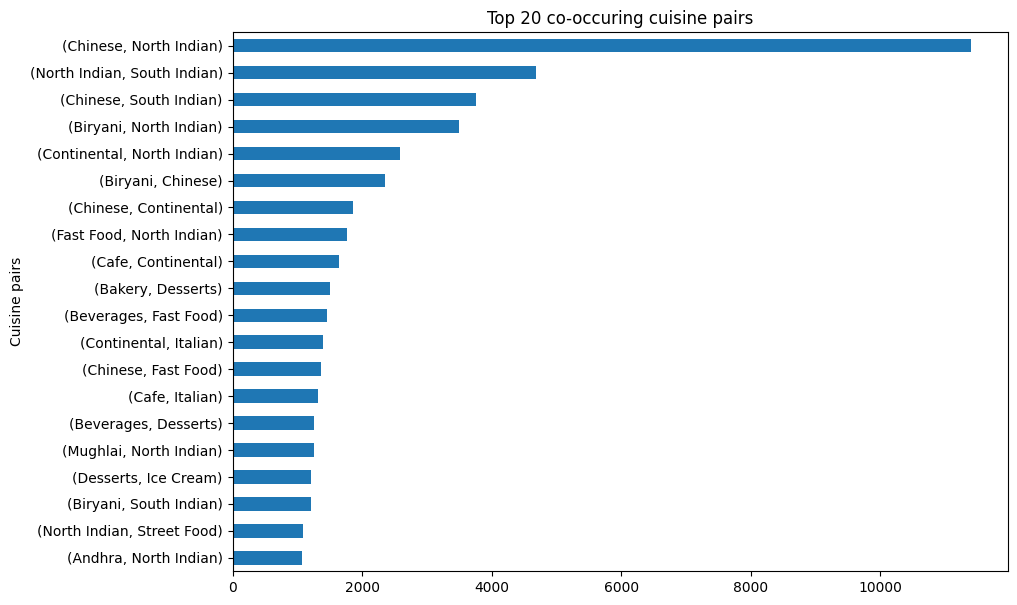

In [127]:
df_pair_count.sort_values(by='Count').plot(kind='barh',x='Cuisine pairs',y='Count',legend=False)
plt.title('Top 20 co-occuring cuisine pairs')
plt.show()

Chinese and North Indian are the most common cuisine pair.